In [116]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/without/without Shear Reinforcement- Sir approved.csv


In [117]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [118]:
datas = pd.read_csv('../input/without/without Shear Reinforcement- Sir approved.csv',encoding='latin-1')
datas

,r,b,d,da,rho,fy,fc,L,l,a,a/d,Vu (kN)
0,100.0,200,303,25.0,2.98,571,39.65,3050,2450,1000.0,3.3,90.64
1,25.0,200,303,25.0,2.98,500,42.38,3050,2600,1000.0,3.3,104.00
2,50.0,200,303,25.0,2.98,500,41.34,3050,2600,1000.0,3.3,89.00
3,100.0,200,303,25.0,2.98,500,39.75,3050,2600,1000.0,3.3,84.00
4,100.0,150,160,19.0,1.06,331,46.50,2800,2200,700.0,4.4,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...
86,23.0,150,388,19.0,0.79,534,34.00,2900,2599,1162.0,3.0,47.25
87,35.0,150,388,19.0,0.79,534,35.10,2900,2599,1162.0,3.0,42.50
88,100.0,200,270,20.0,1.31,650,46.67,2400,2100,700.0,2.6,92.28
89,100.0,200,270,20.0,0.75,590,46.75,2400,2100,700.0,2.6,81.29


In [119]:
datas.shape

(91, 12)

In [120]:
datas.size

1092

In [121]:
datas.head()

,r,b,d,da,rho,fy,fc,L,l,a,a/d,Vu (kN)
0,100.0,200,303,25.0,2.98,571,39.65,3050,2450,1000.0,3.3,90.64
1,25.0,200,303,25.0,2.98,500,42.38,3050,2600,1000.0,3.3,104.00
2,50.0,200,303,25.0,2.98,500,41.34,3050,2600,1000.0,3.3,89.00
3,100.0,200,303,25.0,2.98,500,39.75,3050,2600,1000.0,3.3,84.00
4,100.0,150,160,19.0,1.06,331,46.50,2800,2200,700.0,4.4,21.00


In [122]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   r        91 non-null     float64
 1   b        91 non-null     int64  
 2   d        91 non-null     int64  
 3   da       91 non-null     float64
 4   rho      91 non-null     float64
 5   fy       91 non-null     int64  
 6   fc       91 non-null     float64
 7   L        91 non-null     int64  
 8   l        91 non-null     int64  
 9   a        91 non-null     float64
 10  a/d      91 non-null     float64
 11  Vu (kN)  91 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 8.7 KB


In [123]:
datas.describe()

,r,b,d,da,rho,fy,fc,L,l,a,a/d,Vu (kN)
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,70.934066,200.813187,316.307692,22.010989,1.636703,485.648352,33.538352,2929.890110,2356.461538,940.261319,3.138352,79.914396
std,30.518502,58.460226,108.821025,3.277006,0.853070,92.969335,6.512360,704.180366,839.481405,254.431597,0.786290,52.133155
min,5.000000,150.000000,160.000000,19.000000,0.530000,331.000000,22.560000,1840.000000,200.000000,450.000000,1.500000,12.100000
25%,50.000000,150.000000,200.500000,19.000000,0.830000,449.000000,30.000000,2500.000000,2100.000000,700.000000,2.500000,42.500000
50%,63.500000,200.000000,360.000000,20.000000,1.500000,457.000000,34.480000,2800.000000,2200.000000,900.000000,3.000000,67.130000
75%,100.000000,200.000000,388.000000,25.000000,2.030000,555.000000,37.400000,3150.000000,2700.000000,1162.000000,3.875000,108.350000
max,100.000000,400.000000,600.000000,31.500000,4.090000,651.000000,46.750000,4300.000000,3600.000000,1500.000000,4.400000,261.500000


In [124]:
datas.nunique()

r          12
b           5
d          17
da          4
rho        24
fy         18
fc         41
L          19
l          14
a          19
a/d        14
Vu (kN)    86
dtype: int64

In [125]:

datas.isnull().sum()

r          0
b          0
d          0
da         0
rho        0
fy         0
fc         0
L          0
l          0
a          0
a/d        0
Vu (kN)    0
dtype: int64

<AxesSubplot:>

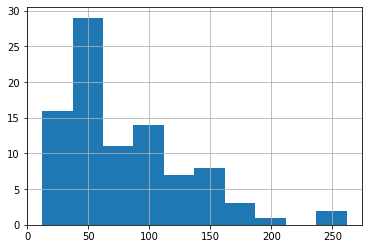

In [126]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
datas['Vu (kN)'].hist()

array([[<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'d'}>],
       [<AxesSubplot:title={'center':'da'}>,
        <AxesSubplot:title={'center':'rho'}>,
        <AxesSubplot:title={'center':'fy'}>],
       [<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'L'}>,
        <AxesSubplot:title={'center':'l'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a/d'}>,
        <AxesSubplot:title={'center':'Vu (kN)'}>]], dtype=object)

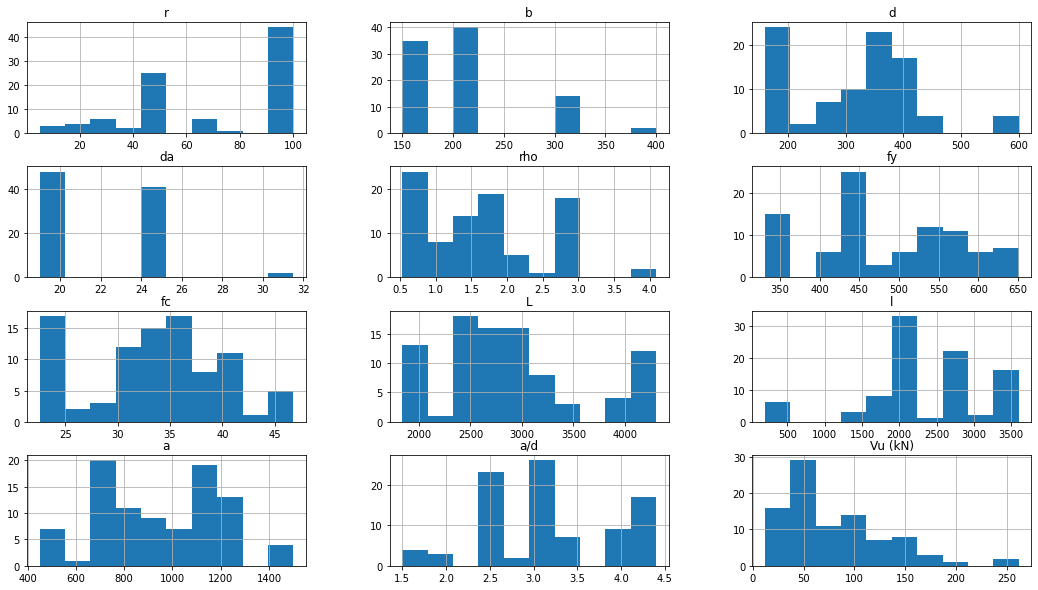

In [127]:
# Plotting histograms of multiple columns together
datas.hist(['r', 'b', 'd',
                 'da','rho', 
                           'fy','fc','L','l','a','a/d', 'Vu (kN)'], figsize=(18,10))

<AxesSubplot:>

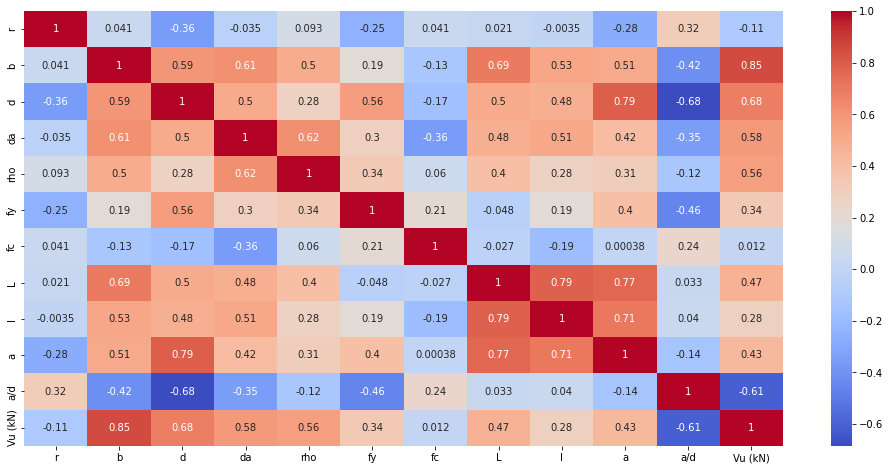

In [128]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sb.heatmap(datas.corr(),annot=True, cmap='coolwarm')

In [129]:
# Calculating correlation matrix
ContinuousCols=['r', 'b', 'd',
                 'da','rho', 
                           'fy','fc','L','l','a','a/d', 'Vu (kN)']

# Creating the correlation matrix
CorrelationData=datas[ContinuousCols].corr()
CorrelationData

,r,b,d,da,rho,fy,fc,L,l,a,a/d,Vu (kN)
r,1.000000,0.041109,-0.355754,-0.034545,0.092566,-0.248650,0.040640,0.020872,-0.003538,-0.280405,0.320363,-0.111135
b,0.041109,1.000000,0.593889,0.613465,0.499845,0.193356,-0.129174,0.690892,0.525763,0.510253,-0.416301,0.852928
d,-0.355754,0.593889,1.000000,0.501289,0.282378,0.559656,-0.168867,0.501591,0.481173,0.792914,-0.683943,0.678576
da,-0.034545,0.613465,0.501289,1.000000,0.623313,0.295970,-0.358302,0.480875,0.514925,0.416425,-0.351048,0.577862
rho,0.092566,0.499845,0.282378,0.623313,1.000000,0.338275,0.060106,0.395365,0.282900,0.307481,-0.119698,0.555039
fy,-0.248650,0.193356,0.559656,0.295970,0.338275,1.000000,0.207624,-0.048182,0.193259,0.399755,-0.456084,0.337051
fc,0.040640,-0.129174,-0.168867,-0.358302,0.060106,0.207624,1.000000,-0.026952,-0.188697,0.000384,0.238771,0.012434
L,0.020872,0.690892,0.501591,0.480875,0.395365,-0.048182,-0.026952,1.000000,0.787290,0.769033,0.032916,0.471564
l,-0.003538,0.525763,0.481173,0.514925,0.282900,0.193259,-0.188697,0.787290,1.000000,0.706495,0.039729,0.284017
a,-0.280405,0.510253,0.792914,0.416425,0.307481,0.399755,0.000384,0.769033,0.706495,1.000000,-0.144527,0.428768


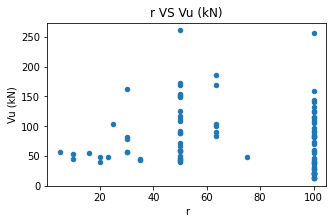

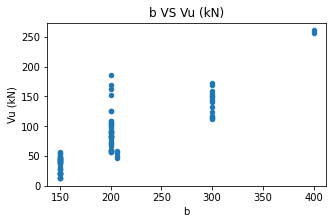

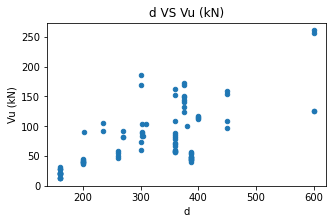

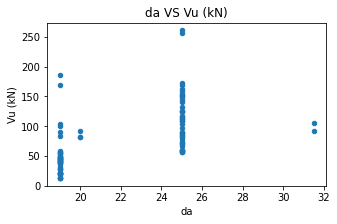

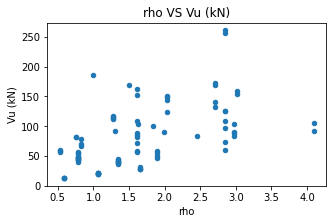

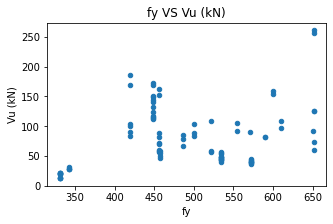

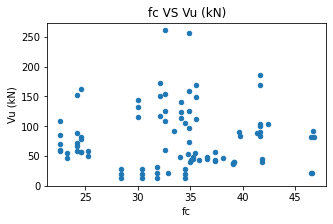

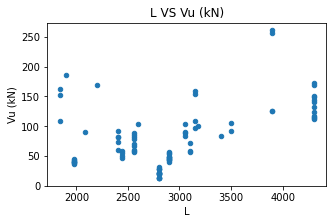

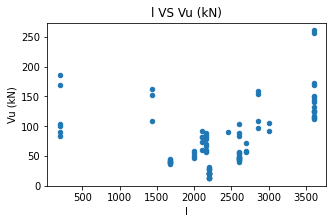

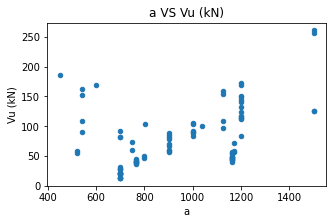

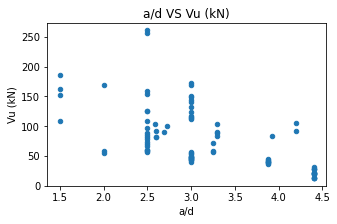

In [130]:
ContinuousCols=['r', 'b', 'd',
                 'da','rho', 
                           'fy','fc','L','l','a','a/d']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    datas.plot.scatter(x=predictor, y='Vu (kN)', figsize=(5,3), title=predictor+" VS "+ 'Vu (kN)')

In [131]:
##SelectedColumns=['b(mm)','d(mm)','D(mm)','da(mm)','rho(%)','l(mm)','a/d']
SelectedColumns=['r', 'b', 'd',
                 'da','rho', 
                           'fy','fc','L','l','a','a/d']
# Selecting final columns
DataForML=datas[SelectedColumns]
DataForML

,r,b,d,da,rho,fy,fc,L,l,a,a/d
0,100.0,200,303,25.0,2.98,571,39.65,3050,2450,1000.0,3.3
1,25.0,200,303,25.0,2.98,500,42.38,3050,2600,1000.0,3.3
2,50.0,200,303,25.0,2.98,500,41.34,3050,2600,1000.0,3.3
3,100.0,200,303,25.0,2.98,500,39.75,3050,2600,1000.0,3.3
4,100.0,150,160,19.0,1.06,331,46.50,2800,2200,700.0,4.4
...,...,...,...,...,...,...,...,...,...,...,...
86,23.0,150,388,19.0,0.79,534,34.00,2900,2599,1162.0,3.0
87,35.0,150,388,19.0,0.79,534,35.10,2900,2599,1162.0,3.0
88,100.0,200,270,20.0,1.31,650,46.67,2400,2100,700.0,2.6
89,100.0,200,270,20.0,0.75,590,46.75,2400,2100,700.0,2.6


In [132]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Vu (kN)']=datas['Vu (kN)']


# Printing sample rows
DataForML_Numeric.head()

,r,b,d,da,rho,fy,fc,L,l,a,a/d,Vu (kN)
0,100.0,200,303,25.0,2.98,571,39.65,3050,2450,1000.0,3.3,90.64
1,25.0,200,303,25.0,2.98,500,42.38,3050,2600,1000.0,3.3,104.00
2,50.0,200,303,25.0,2.98,500,41.34,3050,2600,1000.0,3.3,89.00
3,100.0,200,303,25.0,2.98,500,39.75,3050,2600,1000.0,3.3,84.00
4,100.0,150,160,19.0,1.06,331,46.50,2800,2200,700.0,4.4,21.00


In [133]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['r', 'b', 'd', 'da', 'rho', 'fy', 'fc', 'L', 'l', 'a', 'a/d',
       'Vu (kN)'],
      dtype='object')

In [134]:
# Separate Target Variable and Predictor Variables
TargetVariable='Vu (kN)'
Predictors=['r', 'b', 'd',
                 'da','rho', 
                           'fy','fc','L','l','a','a/d']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [135]:
# Split dataset into training and testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63, 11)
(63,)
(28, 11)
(28,)


In [136]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


In [137]:
models = {
    "                     Linear Regression": LinearRegression(),                
        
    "                 L2 (Ridge) Regression": Ridge(),
    "                 L1 (Lasso) Regression": Lasso(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                              AdaBoost": AdaBoostRegressor(),
      "                              Bagging": BaggingRegressor()
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
                 L2 (Ridge) Regression trained.
                 L1 (Lasso) Regression trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                              AdaBoost trained.
                              Bagging trained.


In [138]:
for name, model in models.items():
    #print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))
    print(name + " R^2: {:.3f}".format(model.score(X_test, y_test)))
    

                     Linear Regression R^2: 0.905
                 L2 (Ridge) Regression R^2: 0.907
                 L1 (Lasso) Regression R^2: 0.907
Support Vector Machine (Linear Kernel) R^2: 0.673
   Support Vector Machine (RBF Kernel) R^2: -0.117
                         Decision Tree R^2: 0.877
                        Neural Network R^2: -1.335
                         Random Forest R^2: 0.882
                     Gradient Boosting R^2: 0.924
                              AdaBoost R^2: 0.901
                              Bagging R^2: 0.879


In [150]:
from sklearn.metrics import r2_score
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))
    #print(name + " R^2: {:.3f}".format(model.score(X_train, y_train)))

                     Linear Regression R^2: 0.90526
                 L2 (Ridge) Regression R^2: 0.90653
                 L1 (Lasso) Regression R^2: 0.90698
Support Vector Machine (Linear Kernel) R^2: 0.67268
   Support Vector Machine (RBF Kernel) R^2: -0.11699
                         Decision Tree R^2: 0.87674
                        Neural Network R^2: -1.33539
                         Random Forest R^2: 0.88230
                     Gradient Boosting R^2: 0.92422
                              AdaBoost R^2: 0.90127
                              Bagging R^2: 0.87922


In [140]:
best_model = Lasso()
best_model.fit(X_train, y_train)

print("Model R^2 (Before Optimization): {:.5f}".format(best_model.score(X_test, y_test)))

Model R^2 (Before Optimization): 0.90698


In [141]:
#params = {
  #  'learning_rate': [0.01, 0.1, 1.0],
  #  'n_estimators': [100, 150, 200],
  #  'max_depth': [3, 4, 5]
#}

#clf = GridSearchCV(best_model, params)
#clf.fit(X_train, y_train)

#clf.best_params_

In [142]:
#print("Model R^2 (After Optimization): {:.5f}".format(clf.score(X_test, y_test)))

In [143]:
x_predict = list(best_model.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(80)

,predicted_values,original_values
0,45.231157,42.50
1,111.322147,104.00
2,145.145910,168.70
3,127.324666,117.50
4,138.241107,171.80
5,118.867470,126.10
6,29.057003,36.40
7,24.155218,31.10
8,111.915759,108.90
9,47.715960,21.40


In [144]:
from math import sqrt
print(sqrt(mean_squared_error(y_test, x_predict)))

17.631609843008896


In [145]:
print(mean_absolute_error(y_test, x_predict))

13.469516791174941


In [146]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, x_predict)

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (/opt/conda/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [ ]:
import pickle
file = 'Without'
save = pickle.dump(best_model,open(file,'wb'))


In [ ]:
new_r=100
new_b=150
new_d=160
new_da=19
new_rho=1.06
new_fy=331
new_fc=46.5
new_L=2800
new_l=2200
new_a=700
new_a/d=4

new_input = [[100,150,160,19,1.06,331,46.50,2800,2200,700,4]]
new_output = model.predict(new_input)
print(new_input, new_output)